In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, svm, metrics
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [107]:
data= pd.read_csv('input/diamonds-datamad1019/data.csv/data.csv')

In [108]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,2.26,Ideal,G,SI2,61.9,57.0,8.44,8.36,5.20,12831
1,2.43,Very Good,H,SI2,63.2,57.0,8.56,8.50,5.39,16170
2,0.80,Premium,F,SI2,61.0,57.0,6.03,6.01,3.67,2797
3,0.40,Ideal,F,I1,63.3,60.0,4.68,4.64,2.95,630
4,0.31,Ideal,G,VS2,61.6,55.0,4.39,4.37,2.70,698


In [109]:
# Replace values of cut
replace_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
data.replace({"cut": replace_cut}, inplace= True)
replace_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
data.replace({"color": replace_color}, inplace= True)
replace_clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
data.replace({"clarity": replace_clarity}, inplace= True)

In [110]:
data.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [111]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [112]:
#data['price_log'] = np.log(data['price'])

In [113]:
#data

In [114]:
#import math
#transf = []
#for val in data['price_log']:
#     transf.append(np.round(math.exp(val),2))

,carat,cut,color,clarity,depth,table,x,y,z,price
carat,1.000000,-0.131916,-0.292759,-0.352239,0.024370,0.180861,0.975010,0.944669,0.948835,0.921898
cut,-0.131916,1.000000,0.021126,0.183393,-0.215829,-0.434086,-0.123010,-0.118121,-0.145905,-0.051159
color,-0.292759,0.021126,1.000000,-0.027759,-0.048099,-0.026999,-0.271085,-0.262272,-0.268004,-0.174816
clarity,-0.352239,0.183393,-0.027759,1.000000,-0.067045,-0.158803,-0.371179,-0.355052,-0.364358,-0.146224
depth,0.024370,-0.215829,-0.048099,-0.067045,1.000000,-0.296418,-0.028645,-0.032708,0.090617,-0.014383
table,0.180861,-0.434086,-0.026999,-0.158803,-0.296418,1.000000,0.195254,0.181997,0.149342,0.125521
x,0.975010,-0.123010,-0.271085,-0.371179,-0.028645,0.195254,1.000000,0.967161,0.966188,0.884500
y,0.944669,-0.118121,-0.262272,-0.355052,-0.032708,0.181997,0.967161,1.000000,0.941816,0.859138
z,0.948835,-0.145905,-0.268004,-0.364358,0.090617,0.149342,0.966188,0.941816,1.000000,0.857643
price,0.921898,-0.051159,-0.174816,-0.146224,-0.014383,0.125521,0.884500,0.859138,0.857643,1.000000


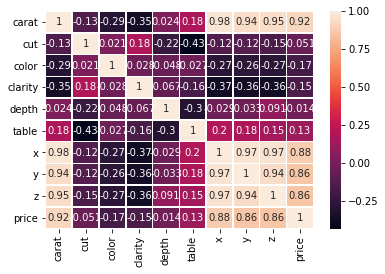

In [115]:
# Correlation Matrix
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, linewidths=0.5, annot=True)
corr

In [116]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['x', 'y', 'z']

In [117]:
data.drop(columns=['x','y','z'],axis=1, inplace= True)

In [118]:
data.head()

,carat,cut,color,clarity,depth,table,price
0,2.26,5,4,2,61.9,57.0,12831
1,2.43,3,3,2,63.2,57.0,16170
2,0.80,4,5,2,61.0,57.0,2797
3,0.40,5,5,1,63.3,60.0,630
4,0.31,5,4,4,61.6,55.0,698


In [119]:
# Normalizar las columnas
features = ['carat', 'depth', 'table']
for col in features:
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col] - mean) / std 

In [120]:
# Separar nuestra 'y'(predictor), y las features
y = data["price"]


In [121]:
X = data.drop(columns=['price'])

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.6)

In [123]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16182, 6), (24273, 6), (16182,), (24273,))

In [124]:
# Importar todos los modelos
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import Ridge
import sklearn.ensemble as skens
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from IPython.core.display import display, HTML




In [126]:
# Aquí le paso el modelo Random Forest
models={'model' : skens.RandomForestRegressor(n_estimators=250,max_depth=4)}

for modelName, model in models.items():
    rf = skens.RandomForestRegressor().fit(X_train, y_train)

In [94]:
y_pred2 = rf.predict(X_test)

In [54]:
df1 = pd.DataFrame({'rforest':y_pred2 , 'gt': y_test})
df1

,rforest,gt
21631,645.230000,526
19069,14867.820000,13263
13177,14238.950000,13713
27662,6978.420000,6720
30095,8507.090000,9874
...,...,...
18192,1035.780000,1076
36082,4209.453333,4744
12111,4078.775000,4113
39473,1212.100000,1168


In [55]:
print(rf.score(X_train, y_train))


#from sklearn.metrics import mean_squared_error

#from math import sqrt
#y_test=np.exp(y_test)
#y_pred2 = np.exp(y_pred2)
#rmse = sqrt(mean_squared_error(y_test, y_pred2))

#rmse

0.9969707139932279


In [56]:
# Aquí le paso el modelo GradientBoosting y creo un df 
models={'model' : skens.GradientBoostingRegressor(n_estimators=100)}
for modelName, model in models.items():
    clf = model.fit(X_train, y_train)
clf = model.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [57]:
print(clf.score(X_train, y_train))


0.9776567467561947


In [58]:
df2 = pd.DataFrame({'GradientBoost':y_pred , 'gt':y_test.reset_index(drop=True)})
df2

,GradientBoost,gt
0,691.605893,526
1,15790.452234,13263
2,13339.050167,13713
3,6659.597355,6720
4,9249.467976,9874
...,...,...
24268,1088.285169,1076
24269,4151.186995,4744
24270,3669.774056,4113
24271,1248.611008,1168


In [59]:
clf.score(X_train, y_train)

0.9776567467561947

In [130]:
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingRegressor
models={'model' : HistGradientBoostingRegressor()}
for modelName, model in models.items():
    est = model.fit(X_train, y_train)
hist = est.fit(X_train, y_train)
y_pred3 = hist.predict(X_test)
hist.score(X_train, y_train)

0.9874110090804707

In [131]:
df3 = pd.DataFrame({'HistGradientBoost':y_pred3 , 'gt':y_test})
df3

,HistGradientBoost,gt
37069,3840.346906,3677
21040,5839.570613,6021
16921,1694.173212,1781
3978,5873.311133,5544
23192,5308.236531,5125
...,...,...
20430,1737.849397,1814
21312,1900.354959,1847
12061,1449.319627,1691
7922,691.966953,622


In [49]:

#y_pred3 = np.exp(y_pred3)


# TEST RANDOM FOREST

In [132]:
data= pd.read_csv('input/diamonds-datamad1019/test.csv')

In [133]:
data

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.56,Ideal,I,VS2,62.1,54.0,5.30,5.33,3.30
1,1,1.05,Ideal,G,VS2,61.9,56.0,6.56,6.52,4.05
2,2,0.50,Premium,E,VS2,61.5,56.0,5.11,5.07,3.13
3,3,0.80,Ideal,F,VS1,62.8,56.0,5.91,5.96,3.73
4,4,0.54,Ideal,G,VS1,61.4,57.0,5.23,5.20,3.20
...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.70,Premium,H,SI1,59.0,60.0,5.86,5.81,3.44
13481,13481,0.55,Ideal,G,VVS2,62.3,53.0,5.27,5.29,3.29
13482,13482,1.54,Ideal,G,SI1,61.5,55.0,7.40,7.45,4.57
13483,13483,0.30,Premium,G,SI2,62.7,55.0,4.29,4.26,2.68


In [134]:
replace_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
data.replace({"cut": replace_cut}, inplace= True)
replace_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
data.replace({"color": replace_color}, inplace= True)
replace_clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
data.replace({"clarity": replace_clarity}, inplace= True)

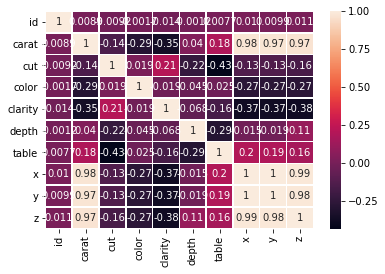

In [135]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, linewidths=0.5, annot=True)

In [136]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['x', 'y', 'z']

In [137]:
data.drop(to_drop,axis=1, inplace= True)

In [138]:
features = ['carat', 'depth', 'table']
for col in features:
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col] - mean) / std 

In [70]:
prueba1 = {modelName:rf.predict(data[["carat", "cut", "color", "clarity", "depth", "table"]]) for modelName, model in models.items()}

testdf1 = pd.DataFrame(prueba1)

testdf1['id']=data['id']


new = testdf1[['id','model']]

new.rename(columns={"model": "price"}, inplace=True)

new.head()



,id,price
0,0,1298.480000
1,1,6552.653333
2,2,1642.947500
3,3,3866.737000
4,4,1700.270000


In [37]:
#new['price']= np.exp(new['price'])

In [38]:
#new.head()

,id,price
0,0,1284.466225
1,1,6681.768025
2,2,1697.741009
3,3,3804.033475
4,4,1779.909160


In [71]:
new.to_csv('output/pruebadiamonds7.csv', index=False)

# TEST2 GRADIENT BOOSTING

In [410]:
data= pd.read_csv('input/diamonds-datamad1019/test.csv')

In [411]:
replace_cut = {'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
data.replace({"cut": replace_cut}, inplace= True)
replace_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
data.replace({"color": replace_color}, inplace= True)
replace_clarity = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
data.replace({"clarity": replace_clarity}, inplace= True)

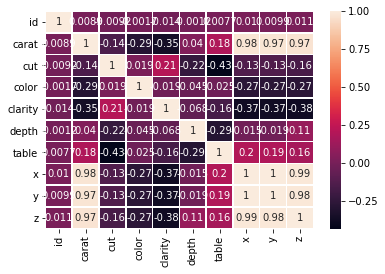

In [412]:
corr = data.corr()

corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, linewidths=0.5, annot=True)

In [413]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['x', 'y', 'z']

In [414]:
data.drop(to_drop,axis=1, inplace= True)

In [415]:
features = ['carat', 'depth', 'table']
for col in features:
    mean = np.mean(data[col])
    std = np.std(data[col])
    data[col] = (data[col] - mean) / std 

# TEST HIST 

In [139]:
prueba1 = {modelName:hist.predict(data[["carat", "cut", "color", "clarity", "depth", "table"]]) for modelName, model in models.items()}

testdf1 = pd.DataFrame(prueba1)

testdf1['id']=data['id']


new_h = testdf1[['id','model']]

new_h.rename(columns={"model": "price"}, inplace=True)

new_h.head()

,id,price
0,0,1410.503595
1,1,6719.635665
2,2,1630.449311
3,3,3908.465900
4,4,1757.295149


In [140]:
new_h.to_csv('output/pruebadiamonds10.csv', index=False)